# 4.10 Coding Etiquette and Excel Reporting Part 2

## Table of content:

## 6-10. Creating an appropriate visualization to show the distribution of profiles.

## Aggregating the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

## Comparing customer profiles with regions and departments.

## Producing suitable charts to illustrate results and export them in the project folder.

# 1. Importing Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 1.1 Importing Data

In [2]:
path = r'C:\Users\Gregor\ownCloud\CareerFoundry\10-2023 Instacart Basket Analysis'

In [3]:
# Import the df_final.pkl file
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_final.pkl'))

In [4]:
# Removing the limit to the amount of columns displayed by default: 
pd.set_option('display.max_columns', None)

In [5]:
# Inspecting dataframe
df

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_days,frequency_flag,gender,state,age,date_joined,number_of_dependants,marital_status,income,region,activity_flag,age_group,income_group,customer_diet,department,dependants_group,family_profile
0,2539329,1,prior,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,active customer,Young Adults,Low Income,vegetarian,beverages,Has dependants,married female with children
1,2398795,1,prior,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,active customer,Young Adults,Low Income,vegetarian,beverages,Has dependants,married female with children
2,473747,1,prior,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,active customer,Young Adults,Low Income,vegetarian,beverages,Has dependants,married female with children
3,2254736,1,prior,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,active customer,Young Adults,Low Income,vegetarian,beverages,Has dependants,married female with children
4,431534,1,prior,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,active customer,Young Adults,Low Income,vegetarian,beverages,Has dependants,married female with children
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30964559,3308056,106143,prior,22,4,20,10.0,19675,1,1,Organic Raspberry Black Tea,94,7,10.7,Mid-range product,Least busy,Slowest days,Average orders,26,Regular customer,10.700000,High spender,7.0,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,West,active customer,Young Adults,Low Income,vegan,beverages,No dependants,"single male, no children"
30964560,2988973,106143,prior,23,2,22,5.0,19675,1,1,Organic Raspberry Black Tea,94,7,10.7,Mid-range product,Regularly busy,Regularly busy days,Average orders,26,Regular customer,10.700000,High spender,7.0,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,West,active customer,Young Adults,Low Income,vegan,beverages,No dependants,"single male, no children"
30964561,930,106143,prior,24,6,12,4.0,19675,1,1,Organic Raspberry Black Tea,94,7,10.7,Mid-range product,Regularly busy,Regularly busy days,Most orders,26,Regular customer,10.700000,High spender,7.0,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,West,active customer,Young Adults,Low Income,vegan,beverages,No dependants,"single male, no children"
30964562,467253,106143,prior,25,6,16,7.0,19675,1,1,Organic Raspberry Black Tea,94,7,10.7,Mid-range product,Regularly busy,Regularly busy days,Most orders,26,Regular customer,10.700000,High spender,7.0,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,West,active customer,Young Adults,Low Income,vegan,beverages,No dependants,"single male, no children"


### Distribution of Family Profiles

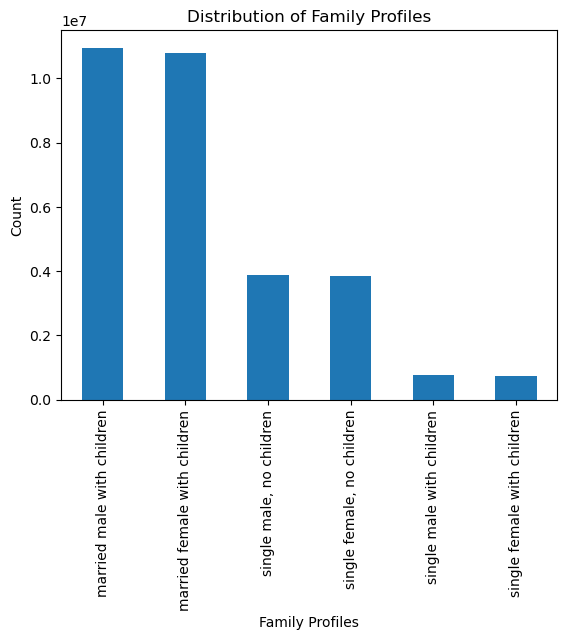

In [6]:
family_profile_distribution_bar = df['family_profile'].value_counts().plot.bar()
plt.title('Distribution of Family Profiles')
plt.xlabel('Family Profiles')
plt.ylabel('Count')
plt.show()

In [9]:
# Exporting the bar outside Jupyter through figure.savefig() - family_profile_distribution_bar
family_profile_distribution_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'family_profile_distribution_bar.png'))

### Basic stats for Family Profile

In [10]:
# Aggregating the max, mean, and min variables on a customer-profile level (family_profile) for usage frequency and expenditure
family_profile_agg = df.groupby('family_profile').agg({'order_id': 'count','prices': ['min', 'mean', 'max']})

In [11]:
family_profile_agg

order_id prices                    
                                 count    min       mean      max
family_profile                                                   
married female with children  10795965    1.0  11.874497  99999.0
married male with children    10947746    1.0  12.013314  99999.0
single female with children     723576    1.0  12.214567  99999.0
single female, no children     3858283    1.0  11.664725  99999.0
single male with children       757596    1.0   9.625240  99999.0
single male, no children       3881398    1.0  12.537981  99999.0

### Family Profile Distribution by Region

In [12]:
# family_profile in different regions 
fam_region_profile = pd.crosstab(df['family_profile'],df['region'], dropna = False)

In [13]:
fam_region_profile

region,Midwest,Northeast,South,West
family_profile,,,,
married female with children,2560027,1857323,3568649,2809966
married male with children,2527235,1996450,3655100,2768961
single female with children,171913,118687,254123,178853
"single female, no children",905542,663656,1314256,974829
single male with children,179522,137743,251334,188997
"single male, no children",917274,690826,1267677,1005621


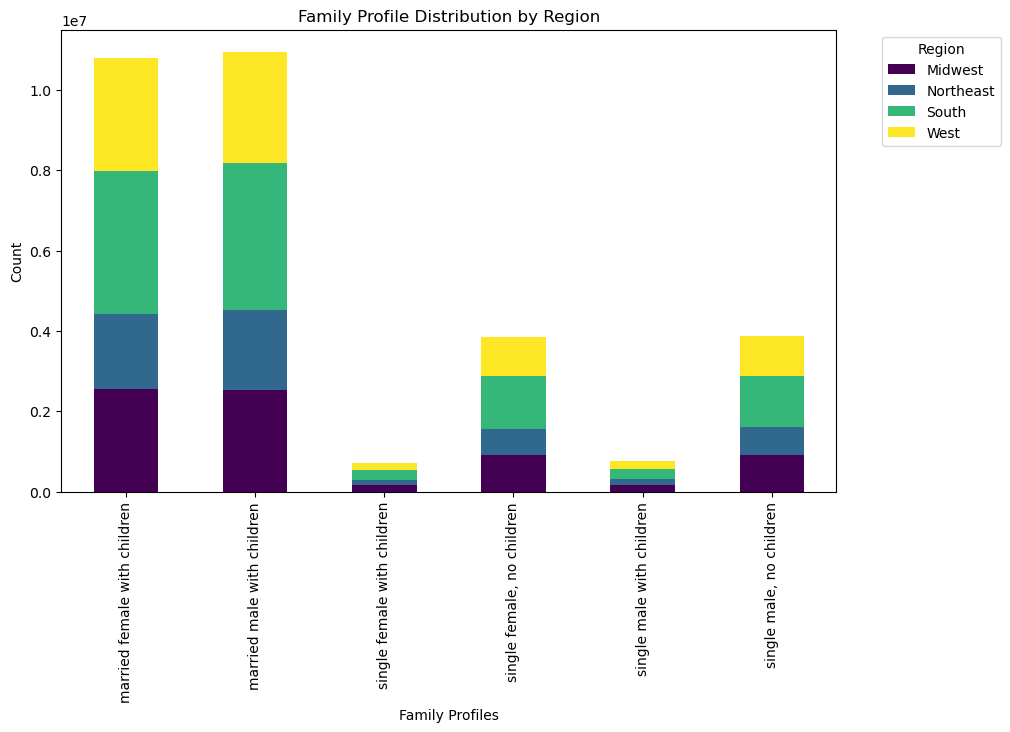

In [69]:
fam_region_profile_bar_stacked = fam_region_profile.plot.bar(stacked=True, figsize=(10, 6), colormap='viridis')

plt.title('Family Profile Distribution by Region')
plt.xlabel('Family Profiles')
plt.ylabel('Count')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')

In [75]:
# Exporting figure
fam_region_profile_bar_stacked.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'fam_region_profile_bar_stacked.png'))

### Family Profile Distribution by Department

In [18]:
# Comparing family_profile in different departments - crosstab created 
fam_departments_profile = pd.crosstab(df['department'],df['family_profile'], dropna = False)

In [19]:
fam_departments_profile

family_profile,married female with children,married male with children,single female with children,"single female, no children",single male with children,"single male, no children"
department,,,,,,
alcohol,52459,46962,3784,18601,4595,18226
babies,140919,146764,9253,50469,10128,52859
bakery,393456,392293,26351,139336,27333,142059
beverages,899671,907782,58292,322421,60815,322920
breakfast,235315,235905,16347,82811,16851,83621
bulk,11884,11934,777,4081,856,3919
canned goods,351369,361208,22967,124165,25510,126855
dairy eggs,1803780,1828819,122983,647898,127224,646478
deli,349284,353049,23776,126183,24343,127199


<Figure size 1000x1200 with 0 Axes>

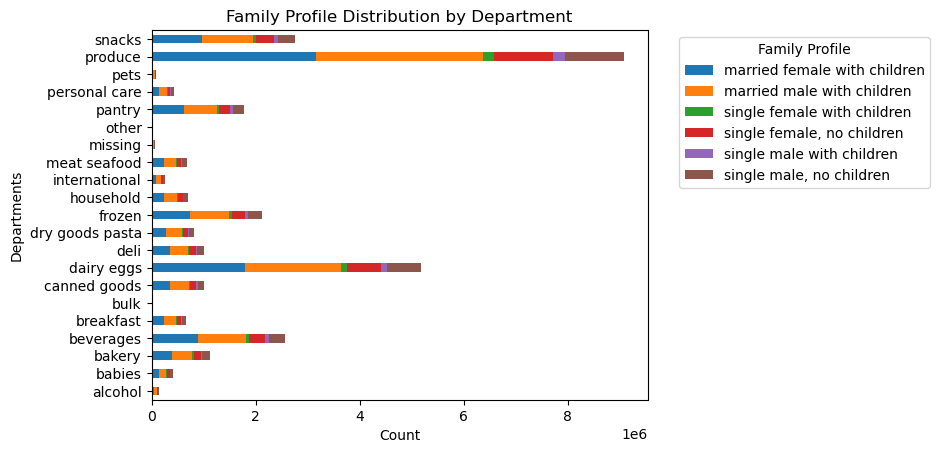

In [74]:
fam_departments_profile_bar = fam_departments_profile.sort_values(by='married female with children', ascending=True)

plt.figure(figsize=(10, 12))  
fam_departments_profile.plot.barh(stacked=True)

plt.title('Family Profile Distribution by Department')
plt.xlabel('Count')
plt.ylabel('Departments')
plt.legend(title='Family Profile', bbox_to_anchor=(1.05, 1), loc='upper left')

# Exporting figure
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'fam_departments_profile_bar.png'))

# Show the plot
plt.show()

### Income (income_group) distribution by age group

In [29]:
income_age = pd.crosstab(df['income_group'], df['age_group'])

In [30]:
income_age

age_group,Young Adults,Middle-Aged Adults,Senior Adults
income_group,,,
Low Income,4050404,2087435,1603166
Middle Income,4586751,4792120,6103427
High Income,101650,2837906,4801065


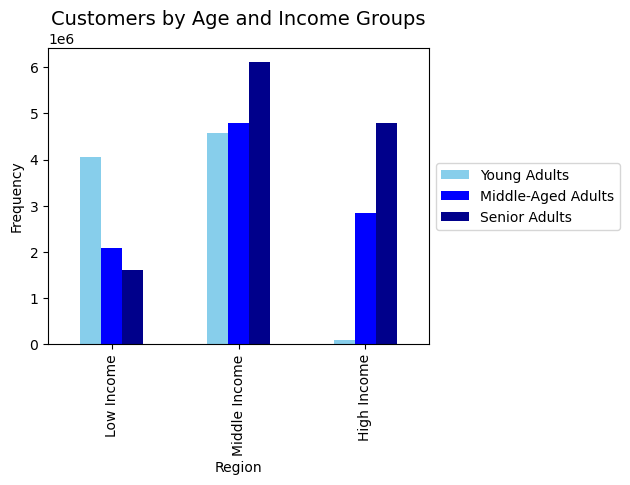

In [34]:
# Creating bar plot of Customers by Age and Income Groups
income_age_bar = income_age.plot.bar(color=['skyblue','blue','darkblue',])
plt.xlabel("Region", fontsize=10)
plt.ylabel("Frequency",fontsize=10)
plt.title("Customers by Age and Income Groups", fontsize=14)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()

In [35]:
# Exporting figure
income_age_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'customers_by_Age_and_Income_Groups.png'))

### Income (income_group) By Region

In [38]:
income_group_region = pd.crosstab(df['income_group'],df['region'])

In [39]:
income_group_region

region,Midwest,Northeast,South,West
income_group,,,,
Low Income,1790670,1367074,2593220,1990041
Middle Income,3628943,2724773,5168652,3959930
High Income,1841900,1372838,2549267,1976616


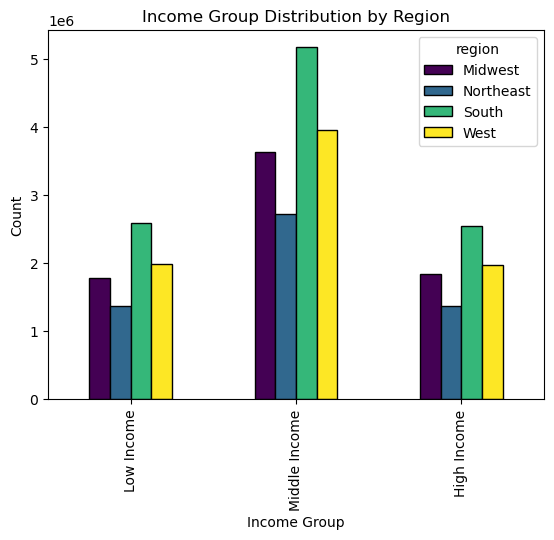

In [40]:
income_group_region_bar = income_group_region.plot(kind='bar', colormap='viridis', edgecolor='black')

# Adding labels and title
plt.title('Income Group Distribution by Region')
plt.xlabel('Income Group')
plt.ylabel('Count')

# Show the plot
plt.show()

In [41]:
# Exporting figure
income_group_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_group_region_bar.png'))

## Income Group Distribution by Department

In [42]:
income_group_department = pd.crosstab(df['department'],df['income_group'], dropna = False) 

In [43]:
income_group_department

income_group,Low Income,Middle Income,High Income
department,,,
alcohol,36825,66940,40861
babies,83835,220883,105674
bakery,264802,565602,290371
beverages,743159,1210209,618459
breakfast,187541,320421,162849
bulk,9400,16510,7541
canned goods,222464,523746,265799
dairy eggs,1229206,2633940,1313938
deli,248143,504673,251018


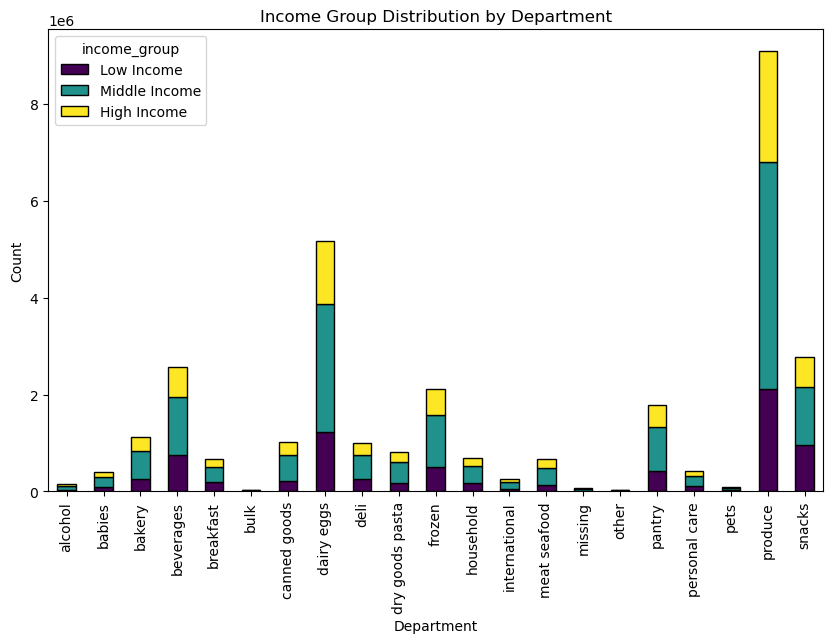

In [44]:
income_group_department_bar = income_group_department.plot(kind='bar', stacked=True, colormap='viridis', edgecolor='black', figsize=(10, 6))

# Adding labels and title
plt.title('Income Group Distribution by Department')
plt.xlabel('Department')
plt.ylabel('Count')

# Show the plot
plt.show()

In [45]:
# Exporting figure
income_group_department_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_group_department_bar.png'))

### Age Group by Region

In [48]:
age_group_region = pd.crosstab(df['region'], df['age_group'], dropna = False)

In [49]:
age_group_region

age_group,Young Adults,Middle-Aged Adults,Senior Adults
region,,,
Midwest,2018411,2328822,2914280
Northeast,1551474,1679322,2233889
South,2950411,3212263,4148465
West,2218509,2497054,3211664


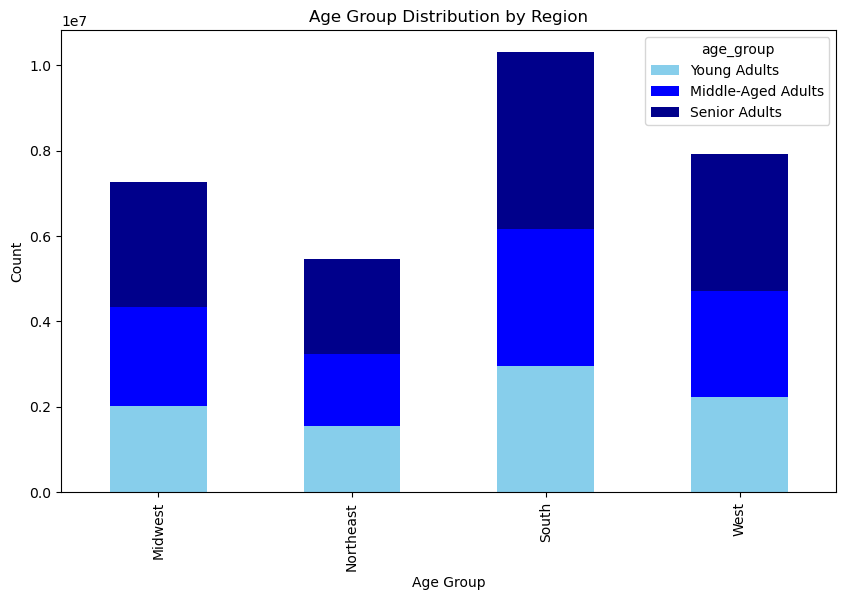

In [50]:
age_group_region_bar = age_group_region.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue','blue','darkblue',])
# Adding labels and title
plt.title('Age Group Distribution by Region')
plt.xlabel('Age Group')
plt.ylabel('Count')

# Show the plot
plt.show()

In [52]:
# Exporting figure
age_group_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_group_region_bar.png'))

### Most Requested Departments

In [53]:
department_stats = df.groupby('department').agg({'order_id': 'count','prices': ['min', 'mean', 'max']})

In [54]:
department_stats

order_id prices                    
                   count    min       mean      max
department                                         
alcohol           144627    1.0   8.150699     15.0
babies            410392    1.0   7.634399     15.0
bakery           1120828    1.0   7.857482     15.0
beverages        2571901    1.0   7.682556     15.0
breakfast         670850    1.0   8.031647     14.9
bulk               33451    1.4   8.346919     14.1
canned goods     1012074    1.0   7.546660     15.0
dairy eggs       5177182    1.0  33.114599  99999.0
deli             1003834    1.0   7.783347     15.0
dry goods pasta   822136    1.0   7.349370     15.0
frozen           2121731    1.0   7.733725     15.0
household         699857    1.0   7.379951     15.0
international     255991    1.0   7.678797     15.0
meat seafood      674781    8.0  16.300034     25.0
missing            64768    1.0   8.660655     15.0
other              34411    1.1   6.961995     15.0
pantry           1782705    1.0   8.014482     20.0
personal care     424306    1.0   7.998744     15.0
pets               93060    1.0   7.887489     15.0
produce          9079273    1.0   7.980348     15.0
snacks           2766406    1.6   4.275555      7.0

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


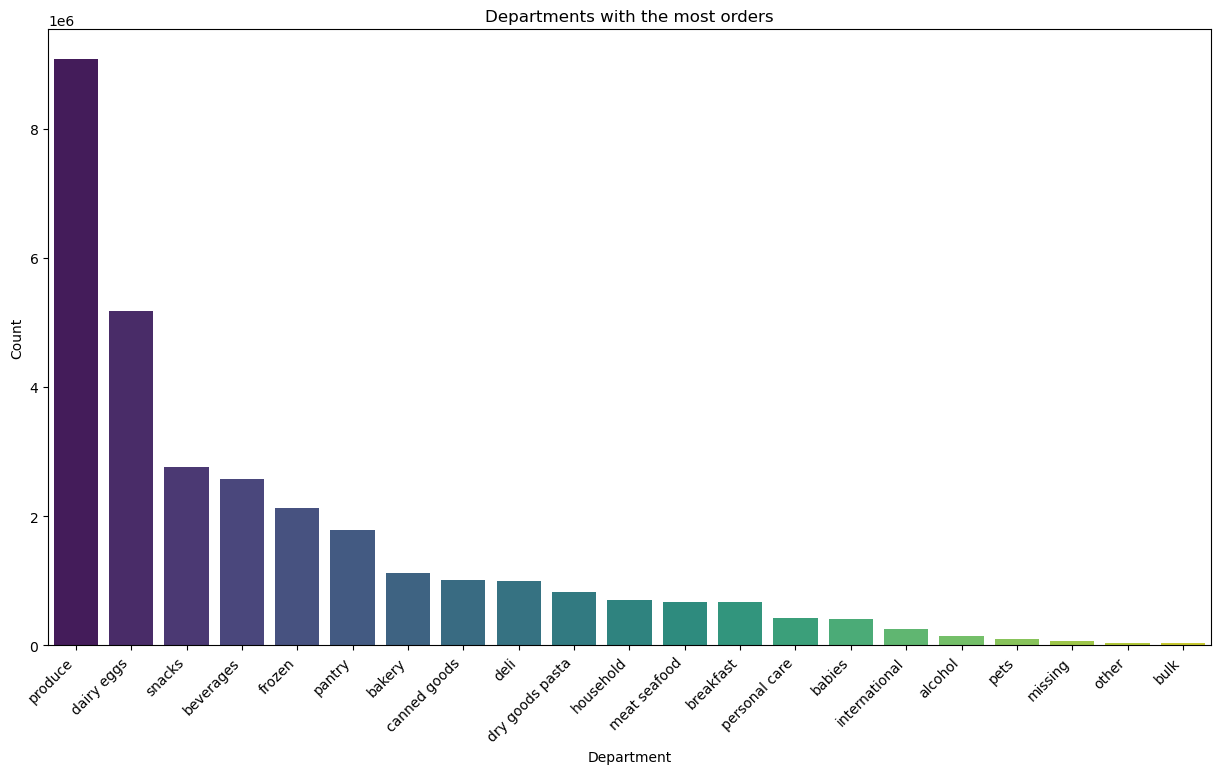

In [57]:
department_counts = df['department'].value_counts()
departments_distribution_bar = plt.figure(figsize=(15, 8))
sns.barplot(x=department_counts.index, y=department_counts.values, palette='viridis')
plt.title('Departments with the most orders')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show() 

In [58]:
# Exporting figure
departments_distribution_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'departments_distribution_bar.png'))

### Busiest days of the week 

In [61]:
df['orders_day_of_week'].value_counts(dropna = False)

orders_day_of_week
0    5908610
1    5411686
6    4291304
5    4033729
2    4024706
3    3669535
4    3624994
Name: count, dtype: int64

In [62]:
#Knowing that 0 = Saturday, 1 = Sunday, 2=Monday, 3 = Tuesday, 4=  Wednesday, 5 = Thursday, 6  = Friday; I created a new column called 'week_days_orders'
df['week_days_orders'] = df['orders_day_of_week'].map({0: 'Saturday', 1: 'Sunday', 2: 'Monday', 3: 'Tuesday', 4: 'Wednesday', 5: 'Thursday', 6: 'Friday'})

In [63]:
df['week_days_orders'].value_counts(dropna = False)

week_days_orders
Saturday     5908610
Sunday       5411686
Friday       4291304
Thursday     4033729
Monday       4024706
Tuesday      3669535
Wednesday    3624994
Name: count, dtype: int64

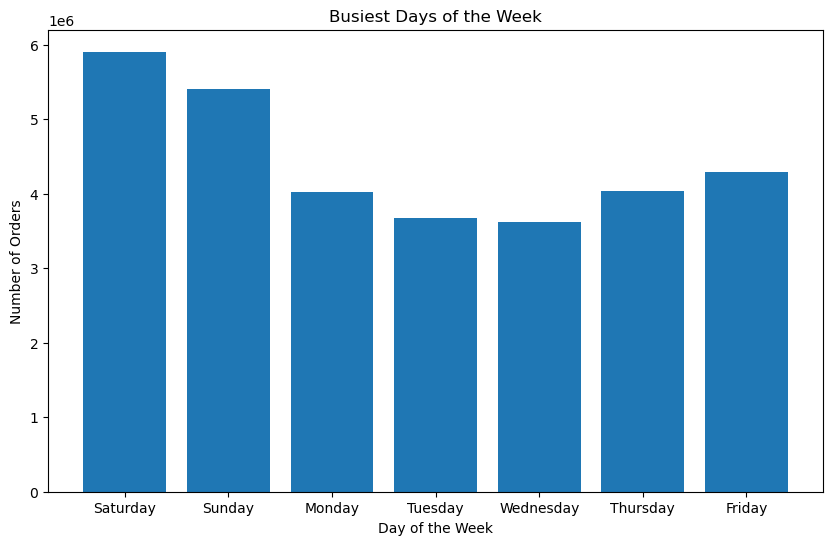

In [64]:
busiest_week_days_bar = df['week_days_orders'].value_counts()
# Sorting the days of the week in the correct order
days_of_week_order = ["Saturday", "Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
busiest_week_days_bar = busiest_week_days_bar.reindex(days_of_week_order)
# Creating a bar chart
plt.figure(figsize=(10, 6))
plt.bar(busiest_week_days_bar.index, busiest_week_days_bar.values)
plt.title('Busiest Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
# Save the figure
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'busiest_week_days_bar.png'))
# Show the plot
plt.show()

### Busiest  hours of the day

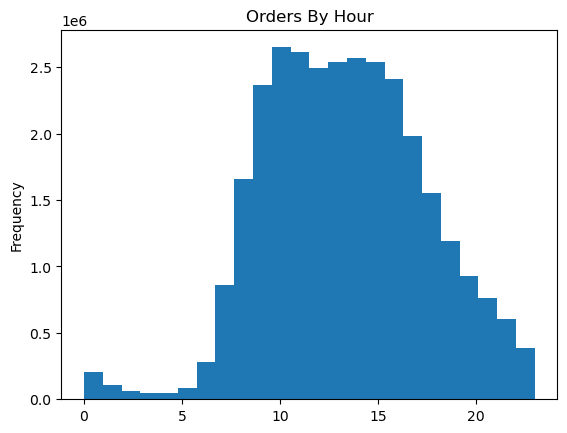

In [65]:
hist_order_hour_of_day = df['order_hour_of_day'].plot.hist(bins = 24, title = 'Orders By Hour')

### Hours during the day when people spend the more money


In [66]:
prices_by_hour = pd.crosstab(df['order_hour_of_day'],df['price_range_loc'], dropna = False)

In [67]:
prices_by_hour

price_range_loc,High-range product,Low-range product,Mid-range product
order_hour_of_day,,,
0,2644,64819,140579
1,1335,34033,74253
2,885,20622,44184
3,611,15029,33156
4,664,15711,34388
5,1018,26074,57326
6,3622,86902,190489
7,11274,267170,584769
8,21155,518313,1119642


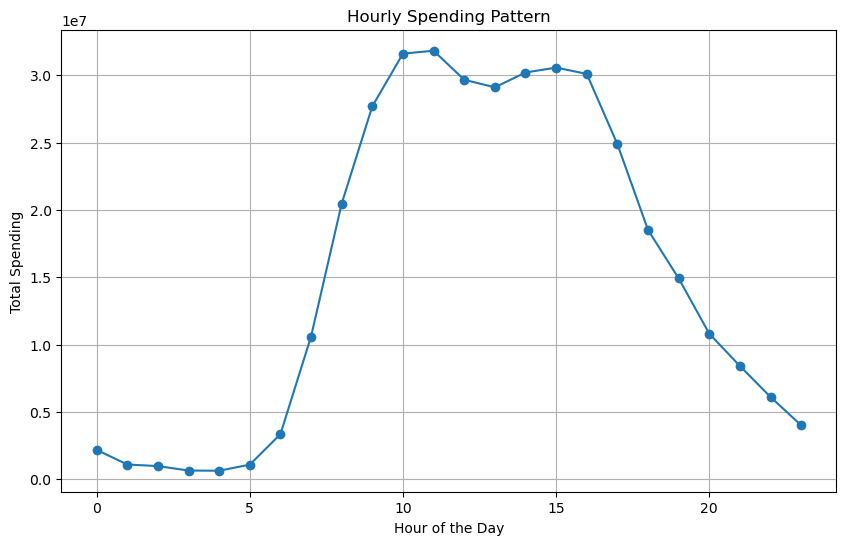

In [68]:
hourly_spending = df.groupby('order_hour_of_day')['prices'].sum()
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(hourly_spending.index, hourly_spending.values, marker='o')
ax.set_title('Hourly Spending Pattern')
ax.set_xlabel('Hour of the Day')
ax.set_ylabel('Total Spending')
ax.grid(True)
# Exporting the plot
fig.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hourly_spending_plot.png'))

### Marital status


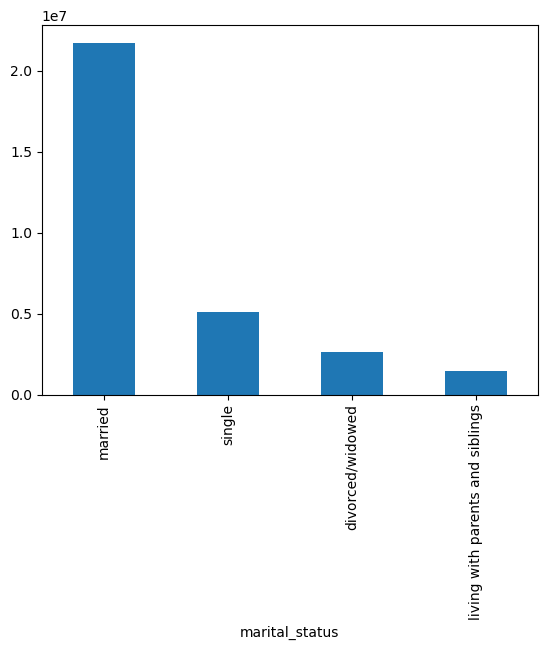

In [76]:
bar_marital = df['marital_status'].value_counts().plot.bar()

In [77]:
bar_marital.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_marital.png'))